# 04_visualize_anchors

In [1]:
import os

import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def visualize(wh_in_mobilenet):
    stride = 32

    colors = [(255, 0, 0), (255, 255, 0), (0, 255, 0), (0, 0, 255), (0, 255, 255), (55, 0, 0),
              (255, 55, 0), (0, 55, 0), (0, 0, 25), (0, 255, 55)]
#     colors = (0, 0, 0)

    anchor_path = os.path.join(dataset_disk, 'generated_anchors_mobilenet')
    for i in range(1, 11):
        cv2.namedWindow('%d_anchors' % int(i))
        cv2.moveWindow('%d_anchors' % int(i), 100, 100)
        blank_image = np.zeros((wh_in_mobilenet[0], wh_in_mobilenet[1], 3), np.uint8)
#         blank_image += 255
        anchor_txt = os.path.join(anchor_path, 'anchors_{}.txt'.format(int(i)))
        anchors = []
        with open(anchor_txt, 'r') as f:
            for i, line in enumerate(f):
                line = line.rstrip('\n')
                anchor = line.split(', ')
                anchors.append(anchor)

        output_img = os.path.join(anchor_txt).replace('.txt', '.png')
        stride_h = 10
        stride_w = 3
        for i in range(len(anchors)):
            (w, h) = map(float, anchors[i])

            w = int(w * stride)
            h = int(h * stride)
            print(w, h)

            # make sure starting coordinates of anchors do not overlap each other
            offset_x = 10 + i * stride_w
            offset_y = 10 + i * stride_h

            cv2.rectangle(blank_image, (offset_x, offset_y), (offset_x + w, offset_y + h), colors[i], 2)

#             cv2.imshow('%d_anchors' % int(i+1), blank_image)
            cv2.waitKey(1000)
            cv2.imwrite(output_img, blank_image)
        plt.imshow(blank_image)
        plt.title('%d_anchors' % int(i+1))
        plt.show()
        print('')

    print('Done!')

113 108


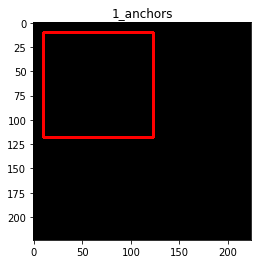


78 79
171 157


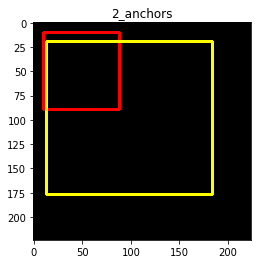


65 70
116 101
181 174


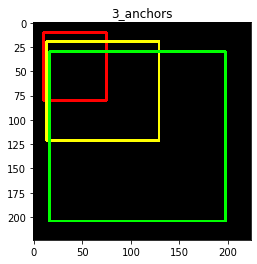


62 58
81 94
143 110
184 181


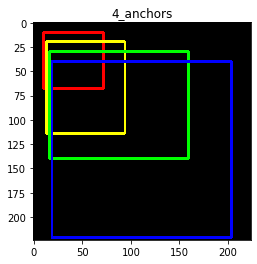


59 59
79 96
138 79
141 143
197 183


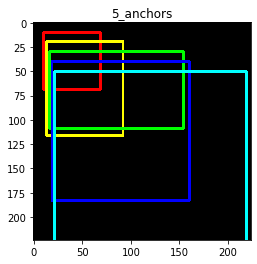


58 57
75 92
112 134
131 74
179 131
189 195


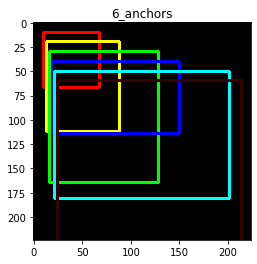


54 51
67 84
95 109
121 68
137 163
176 116
199 193


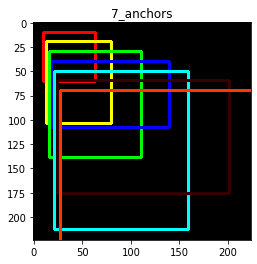


53 56
72 90
103 120
104 62
145 170
151 90
190 133
201 202


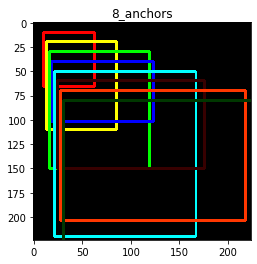


49 45
62 70
76 96
106 123
110 64
145 170
154 94
193 137
201 203


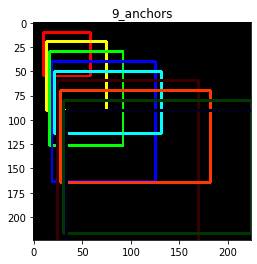


44 47
60 82
66 55
80 98
103 64
111 121
145 173
153 85
189 133
202 202


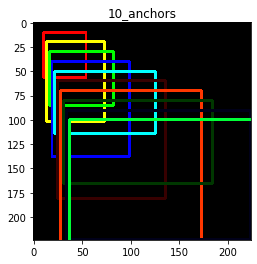


Done!


In [3]:
wn_in_mobilenet = [224, 224]
dataset_disk = os.path.join(os.getcwd(), "Dataset")
visualize(wn_in_mobilenet)

In [6]:
def visualize_on_image(wh_in_mobilenet, whichanchor=5):
    stride = 32

    colors = [(255, 0, 0), (255, 255, 0), (0, 255, 0), (0, 0, 255), (0, 255, 255), (55, 0, 0),
              (255, 55, 0), (0, 55, 0), (0, 0, 25), (0, 255, 55)]

    anchor_path = os.path.join(dataset_disk, 'generated_anchors')
#     for i in range(1, 11):
    i = whichanchor
    cv2.namedWindow('%d_anchors' % int(i))
    cv2.moveWindow('%d_anchors' % int(i), 100, 100)
#     blank_image = np.zeros((wh_in_mobilenet[0], wh_in_mobilenet[1], 3), np.uint8)
#     background_image = cv2.resize(cv2.cvtColor(cv2.imread(image_path), cv2.COLOR_BGR2RGB), 
#                             (wn_in_mobilenet[0], wn_in_mobilenet[1]))
    background_image = cv2.resize(cv2.imread(image_path), (wn_in_mobilenet[0], wn_in_mobilenet[1]))
    anchor_txt = os.path.join(anchor_path, 'anchors_%d.txt' % int(i))
    anchors = []
    with open(anchor_txt, 'r') as f:
        for i, line in enumerate(f):
            line = line.rstrip('\n')
            anchor = line.split(', ')
            anchors.append(anchor)

#     output_img = os.path.join(anchor_txt).replace('.txt', '.png')
    output_img = os.path.join(anchor_path, 'anchors_%d_on_image' % int(whichanchor) + '.png')
    stride_h = 10
    stride_w = 3
    for i in range(len(anchors)):
        (w, h) = map(float, anchors[i])

        w = int(w * stride)
        h = int(h * stride)
        print(w, h)

        # make sure starting coordinates of anchors do not overlap each other
#         offset_x = 10 + i * stride_w
#         offset_y = 10 + i * stride_h
#         offset = (offset_x, offset_y)
        left_corner = (int((wn_in_mobilenet[0]-w)/2), int((wn_in_mobilenet[1]-h)/2))
#         right_corner = (int(((wn_in_mobilenet[0]+w)/2) + offset_x), int(((wn_in_mobilenet[1]+h)/2) + offset_y))
        right_corner = (int((wn_in_mobilenet[0]+w)/2), int((wn_in_mobilenet[1]+h)/2))

#         cv2.rectangle(blank_image, (offset_x, offset_y), (offset_x + w, offset_y + h), colors[i], 2)
        cv2.rectangle(background_image, left_corner, right_corner, colors[i], 4)
#             cv2.imshow('%d_anchors' % int(i+1), blank_image)
        cv2.waitKey(1000)
        cv2.imwrite(output_img, background_image)
        plt.imshow(background_image)
        plt.title('%d_anchors' % int(i+1))
        plt.show()
        print('')

    print('Done!')

59 59


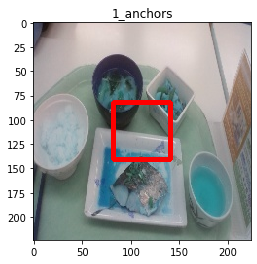


79 96


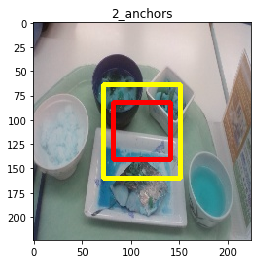


138 79


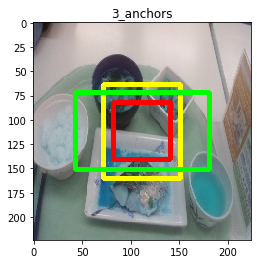


141 143


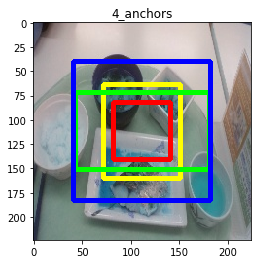


197 183


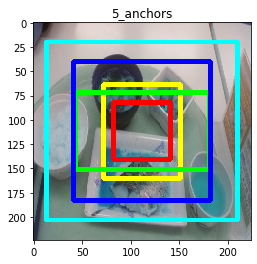


Done!


In [8]:
wn_in_mobilenet = [224, 224]
dataset_disk = os.path.join(os.getcwd(), "Dataset")
image_path = os.path.join(dataset_disk, 'generated_anchors', 'test.jpg')
visualize_on_image(wn_in_mobilenet, 5)

In [33]:
image_path = dataset_disk + 'generated_anchors/' + 'test.jpg'
background_img = cv2.resize(cv2.cvtColor(cv2.imread(image_path), cv2.COLOR_BGR2RGB), 
                            (wn_in_mobilenet[0], wn_in_mobilenet[1]))

In [39]:
cv2.rectangle(background_img, (0, 0), (100, 100), (0, 0, 0), 2)

array([[[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [132, 100,  87],
        [131,  99,  86],
        [130,  98,  85]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [132, 100,  87],
        [132, 100,  87],
        [131,  99,  86]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [152, 125, 116],
        ...,
        [133, 101,  88],
        [132, 100,  87],
        [131,  99,  86]],

       ...,

       [[ 66,  56,  47],
        [ 64,  54,  45],
        [ 62,  52,  43],
        ...,
        [251, 234, 226],
        [248, 232, 219],
        [234, 218, 203]],

       [[ 64,  54,  45],
        [ 63,  53,  44],
        [ 62,  52,  43],
        ...,
        [240, 223, 214],
        [242, 226, 213],
        [237, 221, 206]],

       [[ 64,  54,  45],
        [ 63,  53,  44],
        [ 62,  52,  43],
        ...,
        [231, 214, 205],
        [239, 223, 210],
        [244, 229, 213]]